## Business Understanding

#### El objetivo de este proyecto es modelar el valor de viviendas de acuerdo a sus características.


## Data Understanding

| Nombre |Descripción|
| ------------- |:-------------:|
|id| a notation for a house|
| date| Date house was sold|
| price| Price is prediction target|
|bedrooms|Number of Bedrooms/House|
|bathrooms|Number of bathrooms/House|
|sqft_living|square footage of the home|
|sqft_lot|square footage of the lot|
|floors|Total floors (levels) in house|
|waterfront|House which has a view to a waterfront|
|view|Has been viewed|
|condition|How good the condition is ( Overall )|
|grade|overall grade given to the housing unit, based on King County grading system|
|sqft_above|square footage of house apart from basement|
|sqft_basement|square footage of the basement|
|yr_built|Built Year|

## Data Preparation

## Modeling

In [6]:
# Cargar paquetes
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Cargar dataset
df = pd.read_csv('kc_house_data.csv')

In [9]:
# Inspeccionar dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
del df['id']
del df['date']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [21]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


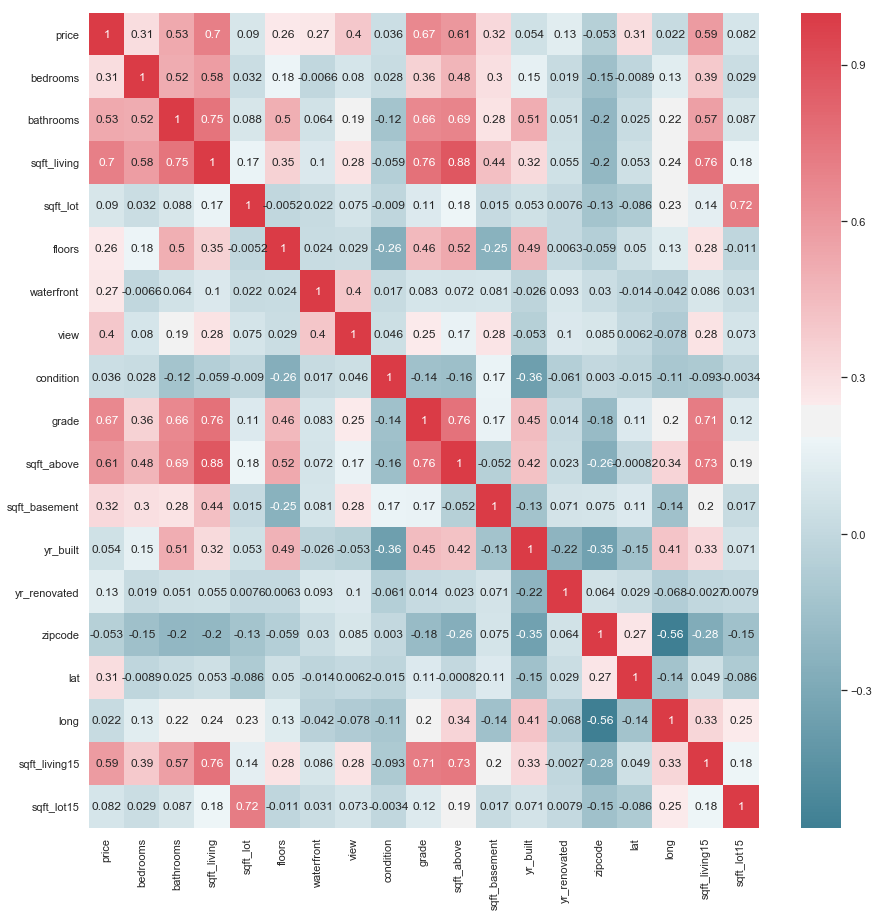

In [26]:
corr = df.corr()
plt.figure(figsize=(15,15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True)


In [28]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

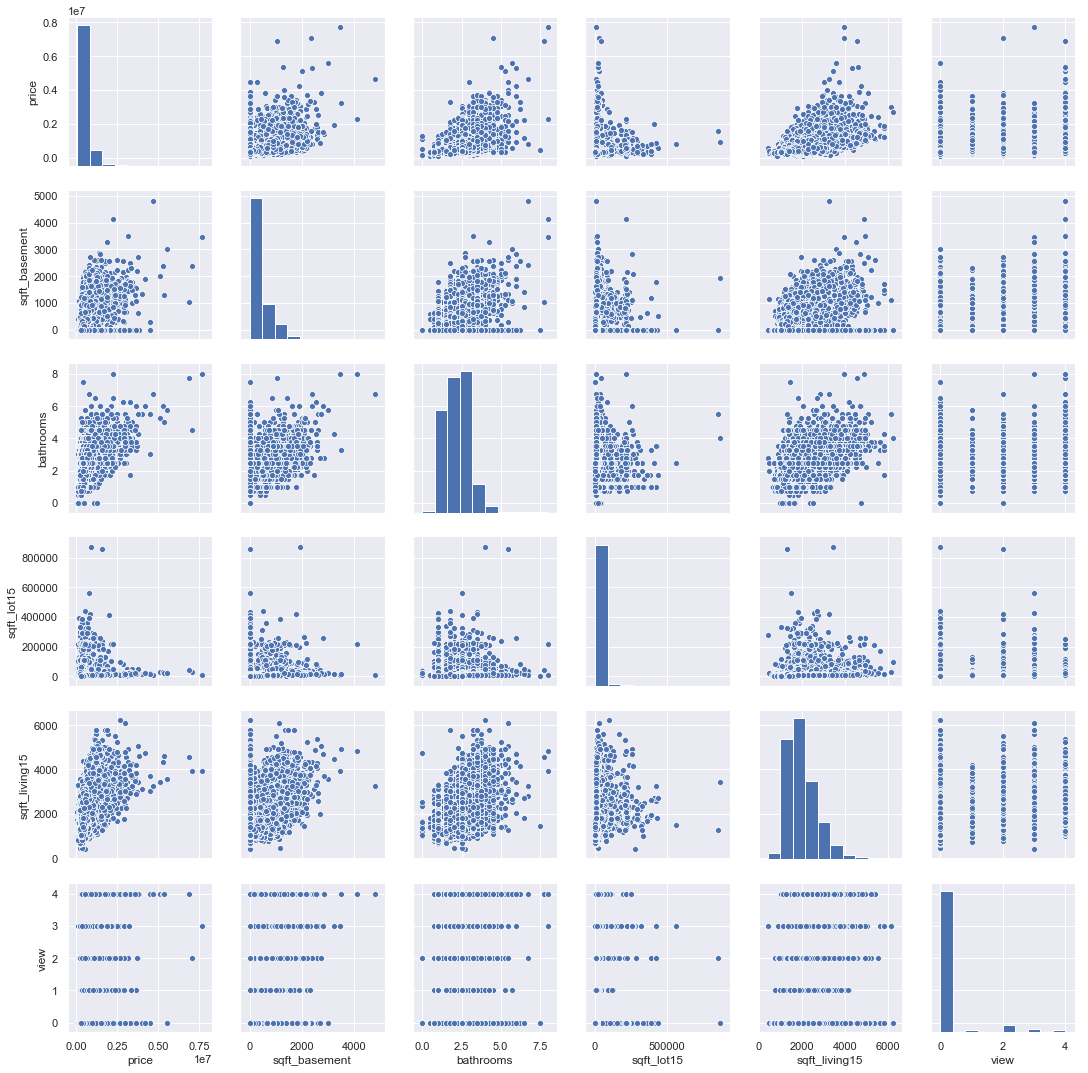

In [66]:
sns.pairplot(df, vars = ["price","sqft_basement","bathrooms","sqft_lot15","sqft_living15","view"])

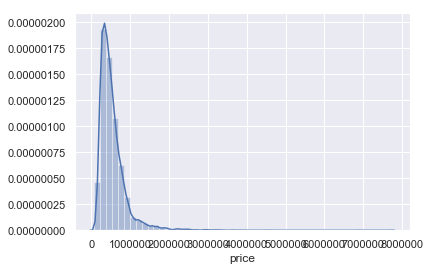

In [37]:
sns.distplot(df['price'])

In [74]:
# Regresión lineal 1 variable
# Selección de variables
y = df[['price']]
X = df[["sqft_living","sqft_basement","bathrooms","sqft_living15"]]

In [75]:
# Cargar modelo
model = sm.OLS(y, X).fit()

# Hacer predicciones
# predictions = model.predict(X)

# Resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.848e+04
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:12:53   Log-Likelihood:            -3.0021e+05
No. Observations:               21613   AIC:                         6.004e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     248.0103      3.921     63.259      0.000     240.326     255.695
sqft_basement    33.7309      4.571      7.379      0.000      24.771      42.691
bathrooms     -2.839e+04   3123.611     -9.088      0.000   -3.45e+04   -2.23e+04
sqft_living15    41.5702      3.456     12.029      0.000      34.797      48.344
==============================================================================
Omnibus:                    16530.268   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           796917.552
Skew:                           3.240   Prob(JB):                         0.00
Kurtosis:                      32.033   Cond. No.                     5.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluation